In [52]:
import pandas as pd
import numpy as np

# Loading and Finding Insights

In [53]:
#reading the dataset
df=pd.read_csv('../student_performance_report_project/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [54]:
# Displaying the columns of the DataFrame
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [55]:
#checking for the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [56]:
#checking for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [57]:
# Displaying unique values in each column
print("Unique values in each column:")
for i in df.columns:
    if df[i].dtype=='object':
        print(i,':',df[i].unique())

Unique values in each column:
gender : ['female' 'male']
race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test preparation course : ['none' 'completed']


In [58]:
# Feature Engineering Block

# 1. Create grade category for classification (for KNN)
def grade_category(score):
    if score < 40:
        return 'low'
    elif score < 70:
        return 'medium'
    else:
        return 'high'

df['grade_level'] = df['math score'].apply(grade_category)

# 2. Combine total and average score (for Linear Regression or EDA)
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3

# 3. Create pass/fail column for binary classification (optional, for Logistic Regression or KNN)
df['passed'] = df['average_score'].apply(lambda x: 1 if x >= 40 else 0)



# EDA

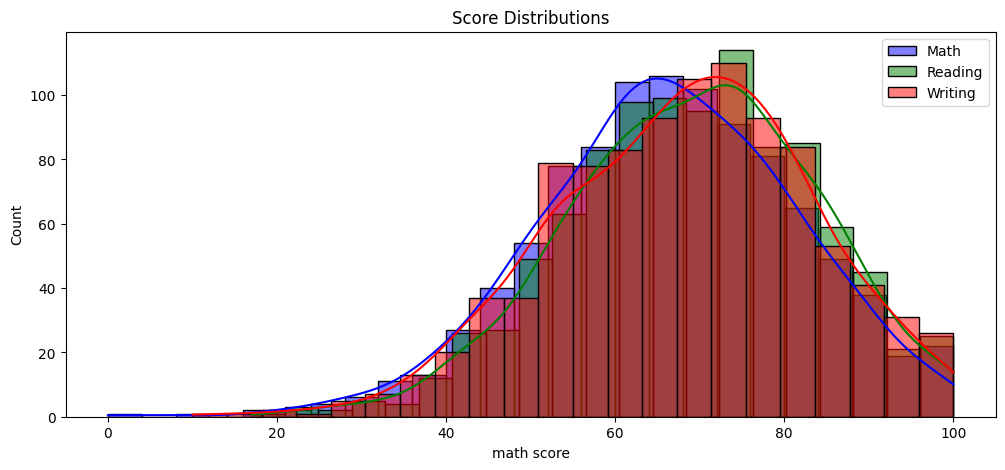

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Math, Reading, and Writing Scores
plt.figure(figsize=(12, 5))
sns.histplot(df['math score'], color='blue', label='Math', kde=True)
sns.histplot(df['reading score'], color='green', label='Reading', kde=True)
sns.histplot(df['writing score'], color='red', label='Writing', kde=True)
plt.legend()
plt.title("Score Distributions")
plt.show()


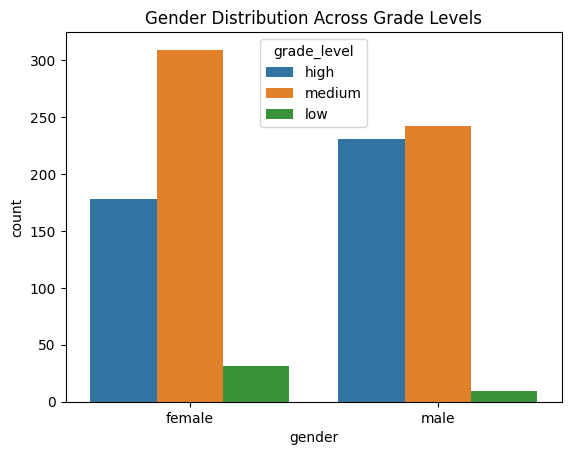

In [60]:
# gender distribution across grade levels
sns.countplot(data=df, x='gender', hue='grade_level')
plt.title("Gender Distribution Across Grade Levels")
plt.show()


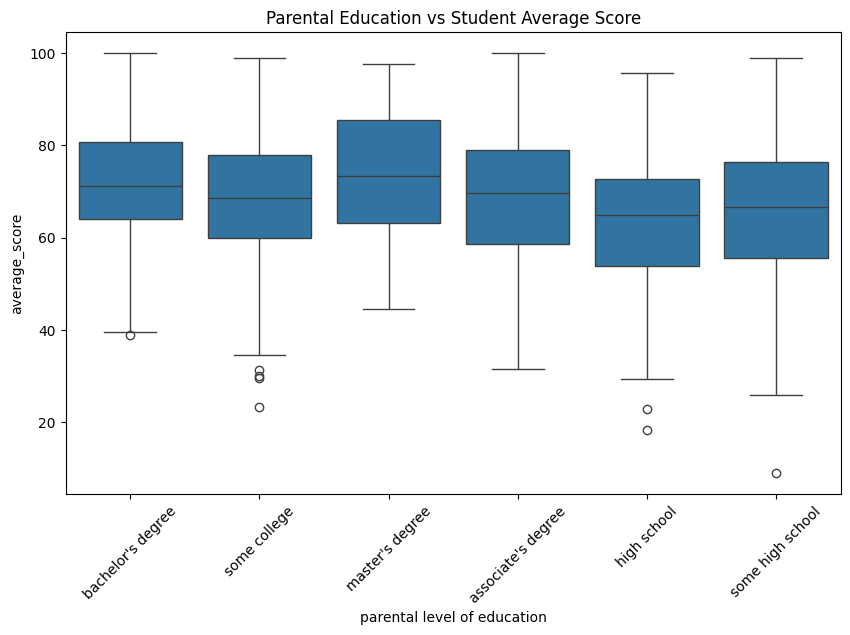

In [61]:
# Average Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='parental level of education', y='average_score')
plt.xticks(rotation=45)
plt.title("Parental Education vs Student Average Score")
plt.show()


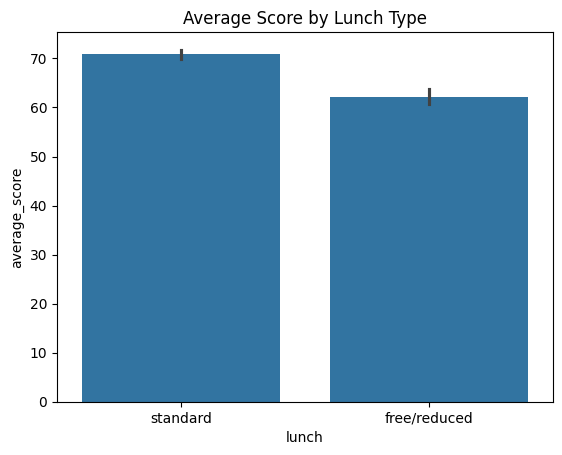

In [62]:
# Average Score by Lunch Type
sns.barplot(data=df, x='lunch', y='average_score')
plt.title("Average Score by Lunch Type")
plt.show()

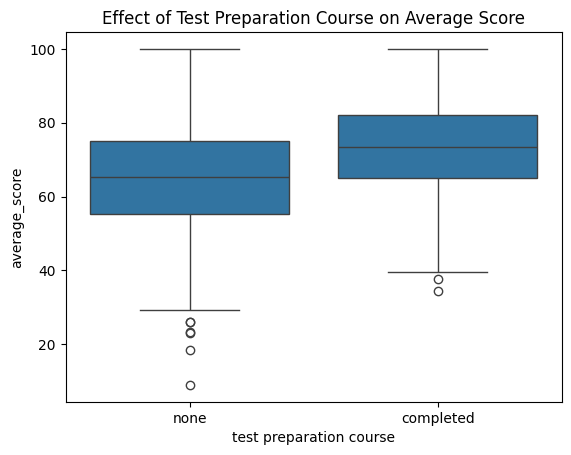

In [63]:
# Effect of Test Preparation Course on Average Score
sns.boxplot(data=df, x='test preparation course', y='average_score')
plt.title("Effect of Test Preparation Course on Average Score")
plt.show()

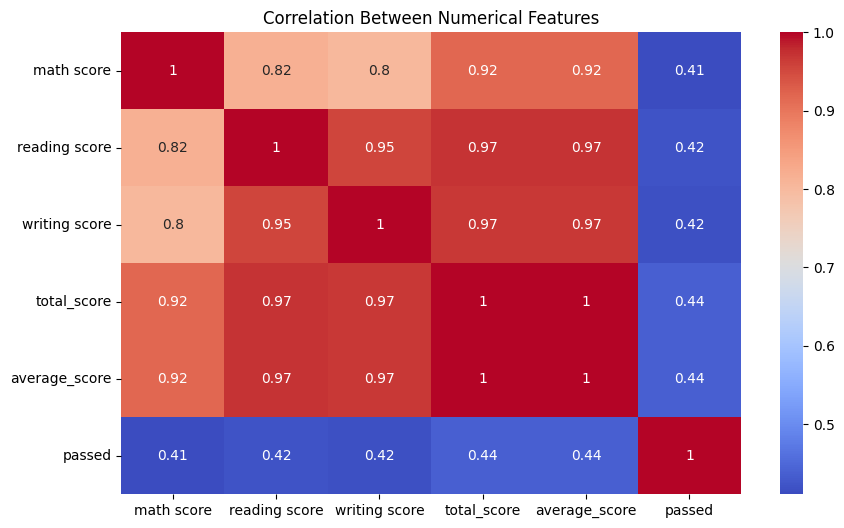

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

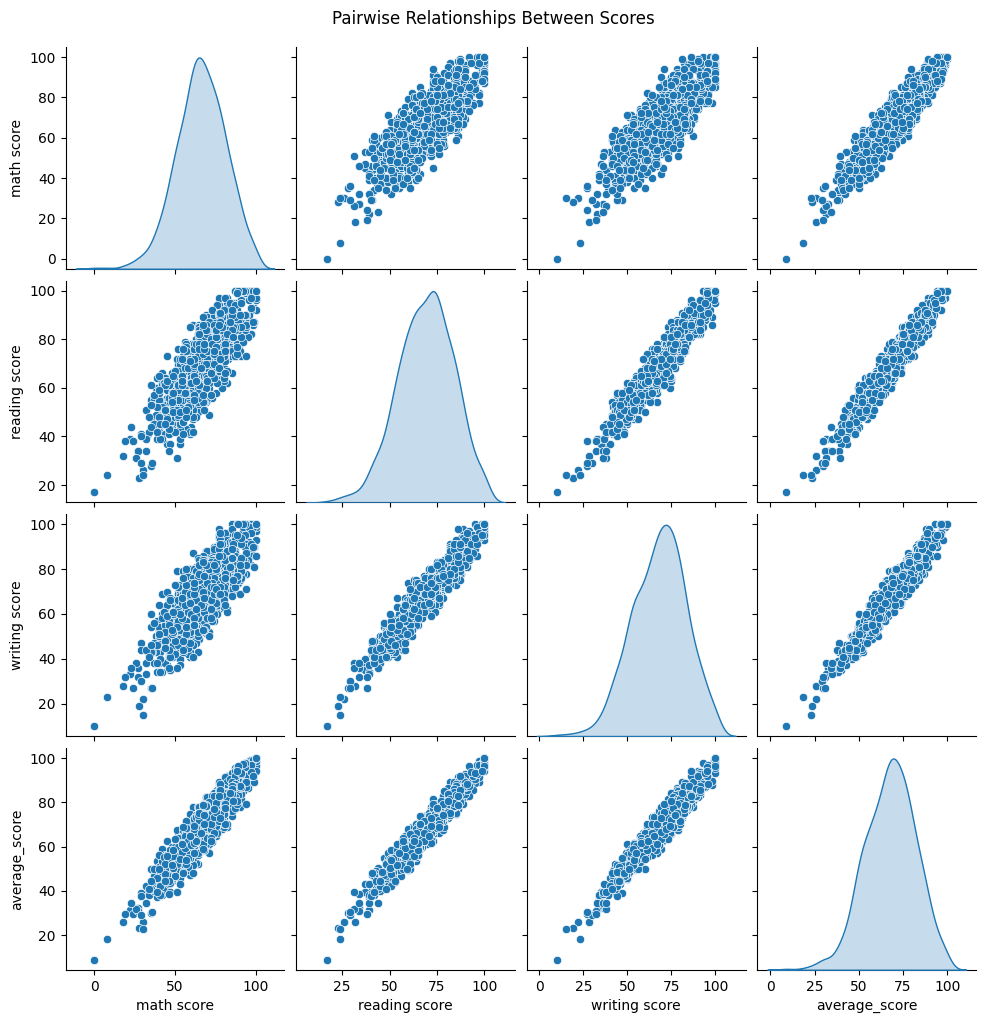

In [65]:
# Pairwise relationships between scores
sns.pairplot(df[['math score', 'reading score', 'writing score', 'average_score']], diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Scores", y=1.02)
plt.show()

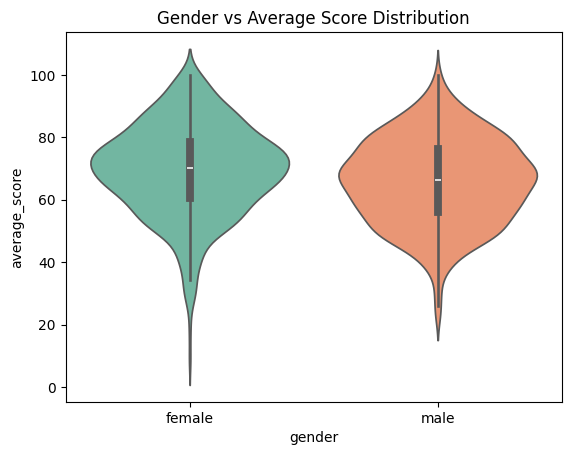

In [66]:
# Violin plot
sns.violinplot(data=df, x='gender', y='average_score', hue='gender',palette="Set2",legend=False)
plt.title("Gender vs Average Score Distribution")
plt.show()

# Data Preprocessing

In [72]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Copy the DataFrame
df_encoded = df.copy()

# Step 2: Label Encode binary categorical columns
le = LabelEncoder()
binary_cols = ['gender', 'lunch', 'test preparation course', 'passed']

for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Step 3: One-Hot Encode multi-category columns
df_encoded = pd.get_dummies(df_encoded, columns=['race/ethnicity', 'parental level of education'], drop_first=True)



In [74]:
# Drop all columns with data type 'object' (which typically means strings)
df_cleaned = df_encoded.select_dtypes(exclude='object')

In [77]:
#drop grade level column if it exists
df_encoded.drop(columns=['grade_level'], inplace=True, errors='ignore')
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   gender                                         1000 non-null   int64  
 1   lunch                                          1000 non-null   int64  
 2   test preparation course                        1000 non-null   int64  
 3   math score                                     1000 non-null   int64  
 4   reading score                                  1000 non-null   int64  
 5   writing score                                  1000 non-null   int64  
 6   total_score                                    1000 non-null   int64  
 7   average_score                                  1000 non-null   float64
 8   passed                                         1000 non-null   int64  
 9   race/ethnicity_group B                         1000 n

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale only numerical features
numeric_features = ['math score', 'reading score', 'writing score', 'average_score']
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])


In [80]:
from sklearn.model_selection import train_test_split

# Example: Predicting if a student passed (Logistic Regression)
df_encoded['passed'] = (df['average_score'] >= 40).astype(int)  # custom binary target

X = df_encoded.drop(['passed'], axis=1) 
y = df_encoded['passed']
print(X.select_dtypes(include='object').columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Index([], dtype='object')


# Model Building and Evaluation 

### Logistic regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.99      1.00      0.99       190

    accuracy                           0.99       200
   macro avg       0.99      0.90      0.94       200
weighted avg       0.99      0.99      0.99       200



C:\Users\atusi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)  # You can tune this later
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.995
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.99      1.00      1.00       190

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       1.00      0.99      0.99       200



### Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.965
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       1.00      0.96      0.98       190

    accuracy                           0.96       200
   macro avg       0.79      0.98      0.86       200
weighted avg       0.98      0.96      0.97       200

